<a href="https://colab.research.google.com/github/th4ruka/machine-learning/blob/main/models/fachion_mnist_cnn/FashionMNIST_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -U tensorflow_datasets

In [36]:
import tensorflow as tf
import tensorflow_datasets as tfds

# helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Load the Dataset

In [37]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
print(f"Training set size: {len(train_dataset)}")
print(f"Test set size: {len(test_dataset)}")

Training set size: 60000
Test set size: 10000


# Exploratory Data Analysis

In [38]:
image_categories = metadata.features["label"].names
print(image_categories)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# Data Preprocessing

In [39]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset = train_dataset.cache()
# train_dataset = train_dataset.shuffle(60000)
# train_dataset = train_dataset.batch(128)
# train_dataset = train_dataset.prefetch(64)
test_dataset = test_dataset.cache()
# test_dataset = test_dataset.batch(128)
# test_dataset = test_dataset.prefetch(64)

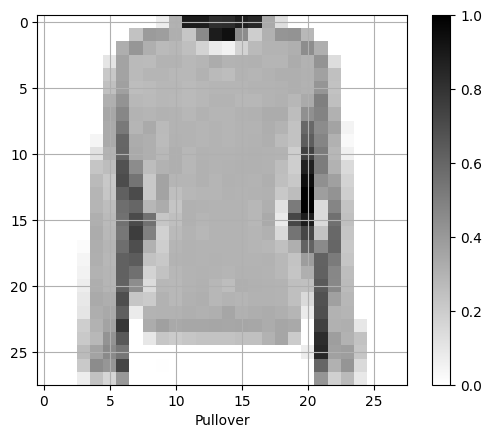

In [40]:
for image, label in train_dataset.take(1):
  break
image = image.numpy().reshape((28, 28))

plt.figure(figsize=(3,3))
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(True)
plt.xlabel(image_categories[label])
plt.show()

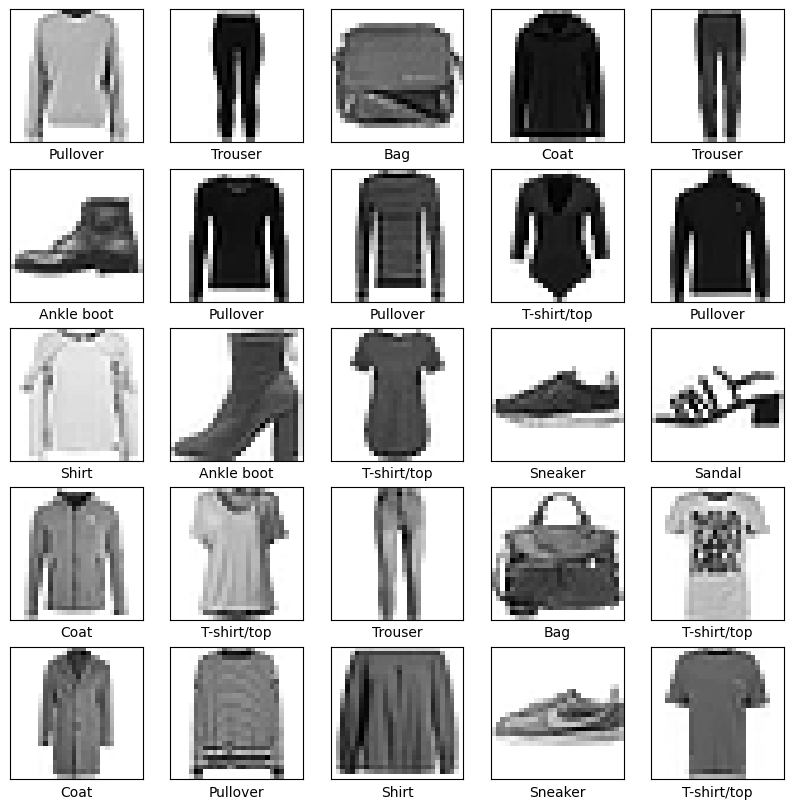

In [41]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(image_categories[label])
plt.show()

# Build the Model

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [43]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
train_dataset = test_dataset.cache().repeat().shuffle(60000).batch(32)
test_dataset = test_dataset.cache().batch(32)

# Train the Model

In [46]:
history = model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(60000/32))

Epoch 1/10
1875/1875 [==============================] - 14s 5ms/step - loss: 0.4803 - accuracy: 0.8297
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3206 - accuracy: 0.8843
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2415 - accuracy: 0.9127
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1926 - accuracy: 0.9303
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1511 - accuracy: 0.9454
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1220 - accuracy: 0.9563
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0985 - accuracy: 0.9651
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0778 - accuracy: 0.9727
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0644 - accuracy: 0.9777
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0

In [48]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

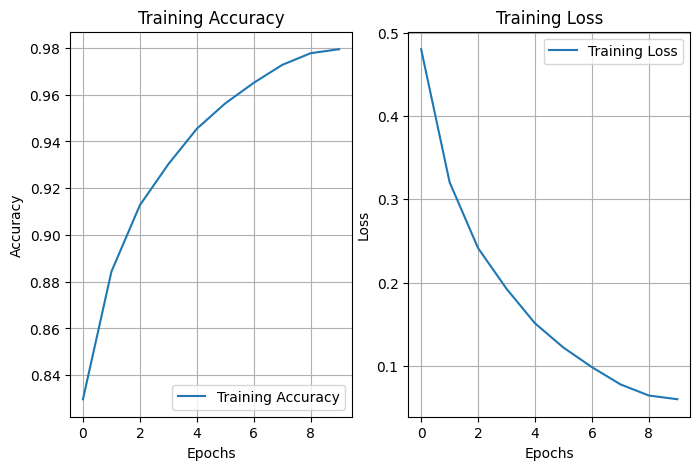

In [54]:
training_accuracy = history.history['accuracy']
training_loss = history.history['loss']

epochs_range = range(10)

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
# plt.savefig('./foo.png')
plt.show()

# Evaluate the Model Using Test Set

In [55]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(10000/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0648 - accuracy: 0.9770
Accuracy on test dataset: 0.9769999980926514


## Predictions

In [58]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 110ms/step


In [59]:
predictions.shape

(32, 10)

In [60]:
predictions[0]

array([4.6207117e-07, 1.5165324e-05, 4.7468225e-04, 4.9815978e-11,
       9.9942172e-01, 8.5271173e-14, 8.7820030e-05, 1.9723912e-07,
       2.8863658e-09, 9.4555441e-10], dtype=float32)

In [61]:
np.argmax(predictions[0])

4

In [64]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(image_categories[predicted_label],
                                100*np.max(predictions_array),
                                image_categories[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

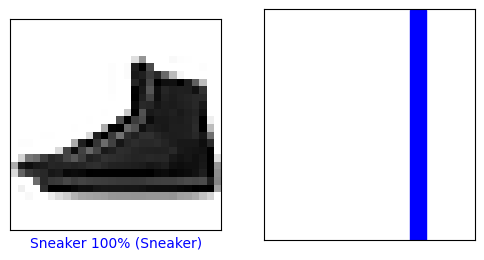

In [67]:
i = 3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)